In [41]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from implementations import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [42]:
#unzip csv 
import zipfile
with zipfile.ZipFile('../data/test.csv.zip') as zip_ref:
    zip_ref.extractall(r"../data")

In [43]:
from proj1_helpers import *

DATA_TRAIN_PATH = '../data/train.csv' #download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

print(y.shape, tx.shape, ids.shape)

(250000,) (250000, 30) (250000,)


## Do your thing crazy machine learning thing here 

### Exploratory Data Analysis

In [44]:
#visualization of the columns
df = pd.read_csv(DATA_TRAIN_PATH)
tx_train = df.drop(['Id','Prediction'],axis=1)
y_train = df.iloc[:,1:2]

In [45]:
tx_train.head(10) 

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [46]:
y_train.head(3)

,Prediction
0,s
1,b
2,b


#### Correlation matrix

In [47]:
#corr_matrix = np.corrcoef(tx) gives allocation error
corr_matrix = tx_train.corr()

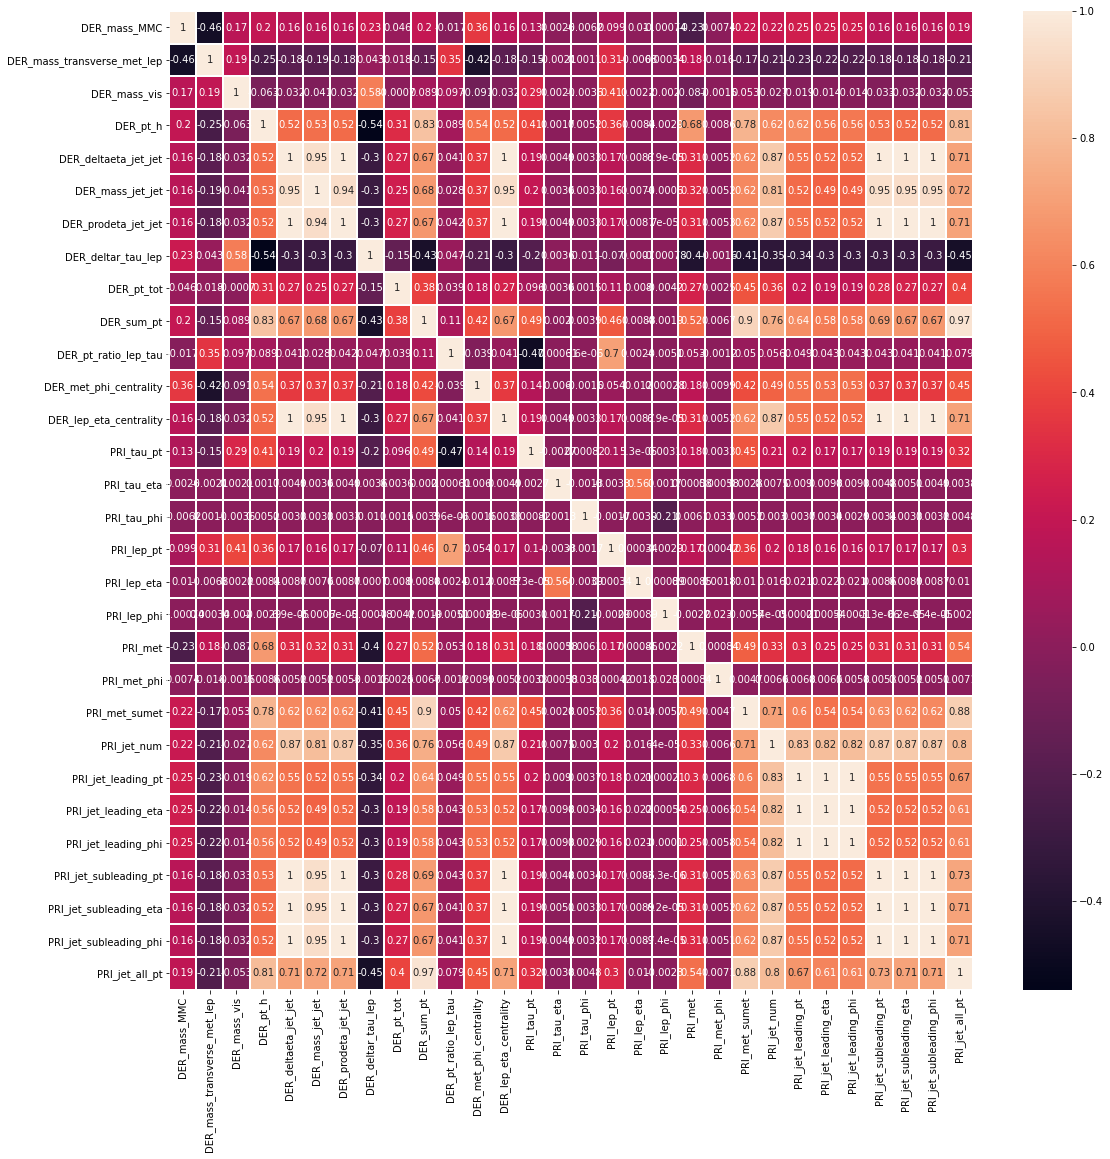

In [48]:
plt.figure(figsize = (18,18))
ax = sns.heatmap(corr_matrix, annot=True,linewidths=1, linecolor='white')

### Feature  processing

#### Removing the correlated colummns

In [49]:
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [50]:
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [51]:
selected_columns = tx_train.columns[columns].values
selected_columns

array(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta',
       'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi',
       'PRI_met', 'PRI_met_phi', 'PRI_jet_num', 'PRI_jet_leading_pt'],
      dtype=object)

In [52]:
rejected_columns = [x for x, y in zip(tx_train.columns, columns) if y == False]
rejected_columns

['DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_met_sumet',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

In [53]:
tx_train_filtered = tx_train[selected_columns]

In [54]:
tx_train_filtered.values.shape

(250000, 20)

#### Removing features according to Jet number

#### Standardize the data

In [55]:
tx_train_filtered.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_num,PRI_jet_leading_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,0.979176,-348.329567
std,406.345647,35.344886,40.828691,63.655682,454.480565,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,0.977426,532.962789
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,0.000000,-999.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,0.000000,-999.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,1.000000,38.960000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,2.000000,75.349000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,3.000000,1120.573000


### 

In [56]:
# standardized data
tx_std = standardize(tx_train_filtered).values
tx_std.shape

(250000, 20)

### Finding the model

In [57]:
gamma = 0.1
max_iters = 100
initial_w = np.zeros(20)

regression_res = [least_squares_GD(y, tx_std, initial_w, max_iters,gamma),
                  least_squares_SGD(y, tx_std, initial_w, max_iters, gamma),
                  least_squares(y, tx_std),
                  ridge_regression(y,tx_std,0.01),
                 ridge_regression(y,tx_std,0.1),
                 ridge_regression(y,tx_std,0.00001),
                 ridge_regression(y,tx_std,0.2)]
regression_names = ["Gradient Descent","Stochastic Gradient Descent", "Least Squares", "Ridge Regression1", "Ridge Regression2", "Ridge Regression3", "Ridge Regression4"]
for i in range (len(regression_res)):
    w,loss = regression_res[i]
    print("{name}, w*={w}, loss={l}\n".format(name=regression_names[i],w=w, l=loss))

Gradient Descent, w*=[ 0.03776055 -0.23367683 -0.17071207  0.00266773  0.10188392  0.20371508
 -0.04598394 -0.06491028 -0.12364124  0.12678504  0.18318575 -0.00112052
 -0.00168231  0.18005391 -0.00078461  0.00263156  0.08163986  0.00122853
 -0.07649959  0.04522236], loss=0.40198173723017794

Stochastic Gradient Descent, w*=[ 1.35579509 -0.55318947 -3.07657244  1.71717964 -1.96575492 -1.30180255
  0.42108913 -0.6852721  -0.0454623   1.63125766  2.64566738 -0.18739931
  1.59317375 -0.35689928  0.53552394 -0.29994778  1.67315096 -0.62162523
 -1.04038832 -1.19087806], loss=1.6303969517400705

Least Squares, w*=[ 0.02488119 -0.26000113 -0.25937958 -0.0560167   0.24033305  0.27173517
 -0.01482143 -0.11257535 -0.18713304  0.12152752  0.20570152 -0.00098681
 -0.00123963  0.30735948 -0.00088071  0.00249047  0.12500191  0.0010295
 -0.27977945  0.18944585], loss=0.3984289738431603

Ridge Regression1, w*=[ 0.03188239 -0.24440382 -0.21810051 -0.02740363  0.16679687  0.23800808
 -0.02884655 -0.09663

### without standardization -> lower loss

In [58]:
tx_train_filtered = tx_train_filtered.values

In [65]:
gamma = 0.01
max_iters = 30
initial_w = np.zeros(20)

regression_res = [least_squares_GD(y, tx, initial_w, max_iters,gamma),
                  least_squares_SGD(y, tx, initial_w, max_iters, gamma),
                  least_squares(y, tx),
                  ridge_regression(y,tx,0.01),
                 ridge_regression(y,tx,0.1),
                 ridge_regression(y,tx,0.00001),
                 ridge_regression(y,tx,0.2)]
regression_names = ["Gradient Descent","Stochastic Gradient Descent", "Least Squares", "Ridge Regression1", "Ridge Regression2", "Ridge Regression3", "Ridge Regression4"]
for i in range (len(regression_res)):
    w,loss = regression_res[i]
    print("{name}, w*={w}, loss={l}\n".format(name=regression_names[i],w=w, l=loss))

Gradient Descent, w*=[ 3.08837946e+111 -1.24385818e+111 -1.81726132e+111 -6.21164257e+110
  2.24109003e+112 -5.68991819e+109 -3.22511272e+110 -2.12235294e+111
 -3.12747850e+109  1.31038268e+109 -7.79546332e+110  3.96773000e+107
  2.81361544e+107 -9.66048463e+110  7.71485277e+107 -9.61991124e+107
 -7.58295856e+110  4.37182088e+107 -6.33737416e+108  1.51173710e+112], loss=3.7271780848270584e+230

Stochastic Gradient Descent, w*=[-2.00910302e+106 -1.20317780e+106 -1.59752272e+106 -1.11546469e+106
  1.80245238e+107 -5.14386954e+104 -4.64459465e+105 -2.84684912e+106
 -7.91951326e+104  8.87527366e+103 -3.85066502e+105 -2.21592825e+104
 -3.41227685e+104 -1.69043940e+106 -2.16880254e+104  2.78295597e+104
 -2.14519959e+105 -3.05095234e+104 -1.80443826e+104 -7.73175699e+105], loss=1.1429018636602804e+229

Least Squares, w*=[ 6.49035154e-05 -7.38455604e-03 -6.25753669e-03 -9.56529351e-04
  5.67248217e-04  3.38494641e-01 -5.55235715e-04 -9.49438287e-04
 -2.23814011e-01  1.01480498e-01  8.97936299e

In [70]:
i=0
losses = np.array([])
for l in np.logspace(-15,-9,30):
    w,loss = ridge_regression(y,tx,l)
    losses = np.append(losses,loss)
    print("{name}, w*={w}, loss={l}\n".format(name="Ridge Regression "+str(l),w=[], l=loss))
    
min(losses)


Ridge Regression 1e-15, w*=[], loss=0.33968680947709334

Ridge Regression 1.6102620275609426e-15, w*=[], loss=0.33968680947709334

Ridge Regression 2.592943797404667e-15, w*=[], loss=0.3396868094770933

Ridge Regression 4.175318936560409e-15, w*=[], loss=0.3396868094770932

Ridge Regression 6.723357536499335e-15, w*=[], loss=0.33968680947709345

Ridge Regression 1.0826367338740562e-14, w*=[], loss=0.3396868094770929

Ridge Regression 1.7433288221999872e-14, w*=[], loss=0.33968680947709323

Ridge Regression 2.8072162039411815e-14, w*=[], loss=0.3396868094770932

Ridge Regression 4.5203536563602406e-14, w*=[], loss=0.3396868094770931

Ridge Regression 7.278953843983161e-14, w*=[], loss=0.33968680947709373

Ridge Regression 1.1721022975334794e-13, w*=[], loss=0.3396868094770941

Ridge Regression 1.8873918221350996e-13, w*=[], loss=0.3396868094770921

Ridge Regression 3.0391953823131946e-13, w*=[], loss=0.3396868094770859

Ridge Regression 4.893900918477499e-13, w*=[], loss=0.3396868094770

0.3396868094770859

### Cross Validation

## Generate predictions and save ouput in csv format for submission:

In [ ]:
# signal  (a  Higgs  boson) --> 1 
# background --> -1 

In [58]:
weights = np.zeros(30)
indices_columns = [tx_train.columns.get_loc(i) for i in selected_columns]
weights[indices_columns] = [ 6.49068887e-05, -7.38458962e-03, -6.25745258e-03, -9.56566507e-04
  ,5.67241481e-04,  3.38487971e-01 ,-5.55261480e-04 ,-9.49454910e-04,
 -2.23810219e-01 , 1.01480469e-01  ,8.97939743e-03 ,-8.18127388e-04,
 -7.17372823e-04  ,1.38807526e-02 ,-6.89532755e-04  ,1.35488914e-03,
  3.79261374e-03  ,5.73273679e-04, -3.16206085e-01  ,3.83182264e-04]

In [67]:
weights = ridge_regression(y,tx,0.00001)[0]

In [60]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [68]:
OUTPUT_PATH = '../data/results.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#first comment